In [274]:
import numpy as np
import cvxpy as cp
import sympy as sp

def f(a, b, x, y):
    import numpy as np
    import cvxpy as cp
    lambda_list = [(a, b, x, y) for a in range(2) for b in range(2) for x in range(2) for y in range(2)]
    for i, tupla in enumerate(lambda_list):
        if tupla == (a, b, x, y):
            return i
    # Se não encontrar, retornar -1
    return -1

def mA(a,x,p):
    s = 0
    for b in range (2):
        s += p[f(a,b,x,0)]
    return(s)

def mB(b,y,p):
    s = 0
    for a in range (2):
        s += p[f(a,b,0,y)]
    return(s)

def func_p(alpha,beta):
    p = []
    pL = []
    pI = []
    pPR = []
    a=0
    b=0
    x=0
    y=0
    
    for a in range(2):
        for b in range(2):
            for y in range(2):
                for x in range(2):
                    pI.append(1/4)
                    if a == 0 and b == 0:
                        pL.append(1)
                    else:
                        pL.append(0)
                    if a^b == x*y:
                        pPR.append(1/2)
                    else:
                        pPR.append(0)
                    
    pI = np.array(pI)
    pL = np.array(pL)
    pPR = np.array(pPR)
    p = alpha*pPR+(1-alpha)*(beta*pL+(1-beta)*pI)
    return(p)

def func_G(alpha,beta,X,Y):
    p = func_p(alpha,beta)
    G = []
    F = ['1','E00','E01','F00','F01']
    FF = {
        ('1', '1'): 1,
        ('1', 'E00'): mA(0,0,p),
        ('1', 'E01'): mA(0,1,p),
        ('1', 'F00'): mB(0,0,p),
        ('1', 'F01'): mB(0,1,p),
        ('E00', 'E00'): mA(0,0,p),
        ('E00', 'E01'): X,
        ('E00', 'F00'): p[f(0,0,0,0)],
        ('E00', 'F01'): p[f(0,0,0,1)],
        ('E01', 'E01'): mA(0,1,p),
        ('E01', 'F00'): p[f(0,0,1,0)],
        ('E01', 'F01'): p[f(0,0,1,1)],
        ('F00', 'F00'): mB(0,0,p),
        ('F00', 'F01'): Y,
        ('F01', 'F01'): mB(0,1,p)    
    }
    G = np.empty((5, 5),dtype=object)
    # Preencher a matriz com os resultados conhecidos
    for i, f1 in enumerate(F):
        for j, f2 in enumerate(F):
            if (f1, f2) in FF:
                G[i, j] = FF[(f1, f2)]
            elif (f2, f1) in FF:
                G[i, j] = FF[(f2, f1)]

    G = cp.bmat(G.tolist())
    return(G)

In [246]:
def func_opt(beta):    
    alpha = cp.Variable()
    x = cp.Variable()
    y = cp.Variable()
    G = func_G(alpha,beta,x,y)
    objective = cp.Maximize(alpha)
    constraints = [alpha >=0, alpha<=1, G >> 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    #print("Status do problema:", problem.status)
    #print("Valor de alpha:", alpha.value)
    #print("Valor de x:", x.value)
    #print("Valor de y:", y.value)
    if problem.status == 'optimal':
        return alpha.value, x.value, y.value
    else:
        print("Problema não foi resolvido corretamente para beta =", beta)
        return None

for beta in np.linspace(0, 1, 20):
    alpha_opt, x_opt, y_opt = func_opt(beta)
    if alpha_opt is not None and x_opt is not None and y_opt is not None:
        print("Para beta =", beta, "x =", x_opt, "y =", y_opt)
        print("O valor de alpha máximo é:", alpha_opt)
    else:
        print("Problema não foi resolvido para beta =", beta)




Para beta = 0.0 x = 0.2499999996886421 y = 0.24999999968864206
O valor de alpha máximo é: 0.7071067874339159
Para beta = 0.05263157894736842 x = 0.2634365394917248 y = 0.2634365394917248
O valor de alpha máximo é: 0.6990087091536877
Para beta = 0.10526315789473684 x = 0.2774995682258799 y = 0.27749956822587984
O valor de alpha máximo é: 0.6900751242661337
Para beta = 0.15789473684210525 x = 0.2923027046939879 y = 0.2923027046939878
O valor de alpha máximo é: 0.6802098053755002
Para beta = 0.21052631578947367 x = 0.30797617156197216 y = 0.3079761715619721
O valor de alpha máximo é: 0.6692947183451174
Para beta = 0.2631578947368421 x = 0.32467203130431127 y = 0.3246720313043112
O valor de alpha máximo é: 0.6571850621925539
Para beta = 0.3157894736842105 x = 0.34257091603425033 y = 0.34257091603425033
O valor de alpha máximo é: 0.6437023848172968
Para beta = 0.3684210526315789 x = 0.36189087257738667 y = 0.3618908725773867
O valor de alpha máximo é: 0.6286252666006864
Para beta = 0.421052

In [400]:
def func_Mp(p):
    s=0
    pM = []
    lambda_list = [(lambda a, b, x, y: (a, b, x, y))(a, b, x, y) for a in range(2) for b in range(2) for x in range(2) for y in range(2)]
    for k, (a, b, x, y) in enumerate(lambda_list):
        s=0
        for ai in range (2):
            for bj in range (2):
                for i in range (2):
                    for j in range (2):
                        if ai != a and bj != b and i != x and j != y:
                            s += p[f(ai,bj,x,y)]
        pM.append(s)
    #pM = cp.vstack(pM)
    pM = np.array(pM)
    return(pM)

alpha = 0
beta = 0.05263157894736842
p = func_p(alpha,beta)
pm = func_Mp(p)
print(p,pm)

[0.28947368 0.28947368 0.28947368 0.28947368 0.23684211 0.23684211
 0.23684211 0.23684211 0.23684211 0.23684211 0.23684211 0.23684211
 0.23684211 0.23684211 0.23684211 0.23684211] [0.23684211 0.23684211 0.23684211 0.23684211 0.23684211 0.23684211
 0.23684211 0.23684211 0.23684211 0.23684211 0.23684211 0.23684211
 0.28947368 0.28947368 0.28947368 0.28947368]


In [409]:
alpha_values2

array(0.)

In [410]:
def func_opt2(beta):    
    alpha = cp.Variable()
    objective = cp.Minimize(alpha)
    p =  func_p(alpha,beta)
    pm = func_Mp(func_p(alpha,beta))
    p = cp.hstack(p)
    pm = cp.hstack(pm)
    constraints = [alpha >=0, alpha<=1, cp.sum(p - pm) == 0]
    problem = cp.Problem(objective, constraints)
    problem.solve()
    #print("Status do problema:", problem.status)
    #print("Valor de alpha:", alpha.value)
    if problem.status == 'optimal':
        return alpha.value
    else:
        print("Problema não foi resolvido corretamente para beta =", beta)
        return None


for beta in np.linspace(0, 1, 20):
    alpha_opt = func_opt2(beta)
    if alpha_opt is not None:
        print("Para beta =", beta)
        print("O valor de alpha minimo é:", alpha_opt)
    else:
        print("Problema não foi resolvido para beta =", beta)

Para beta = 0.0
O valor de alpha minimo é: 0.0
Para beta = 0.05263157894736842
O valor de alpha minimo é: 0.0
Para beta = 0.10526315789473684
O valor de alpha minimo é: 0.0
Para beta = 0.15789473684210525
O valor de alpha minimo é: 0.0
Para beta = 0.21052631578947367
O valor de alpha minimo é: 0.0
Para beta = 0.2631578947368421
O valor de alpha minimo é: 0.0
Para beta = 0.3157894736842105
O valor de alpha minimo é: 0.0
Para beta = 0.3684210526315789
O valor de alpha minimo é: 0.0
Para beta = 0.42105263157894735
O valor de alpha minimo é: 0.0
Para beta = 0.47368421052631576
O valor de alpha minimo é: 0.0
Para beta = 0.5263157894736842
O valor de alpha minimo é: 0.0
Para beta = 0.5789473684210527
O valor de alpha minimo é: 0.0
Para beta = 0.631578947368421
O valor de alpha minimo é: 0.0
Para beta = 0.6842105263157894
O valor de alpha minimo é: 0.0
Para beta = 0.7368421052631579
O valor de alpha minimo é: 0.0
Para beta = 0.7894736842105263
O valor de alpha minimo é: 0.0
Para beta = 0.8421

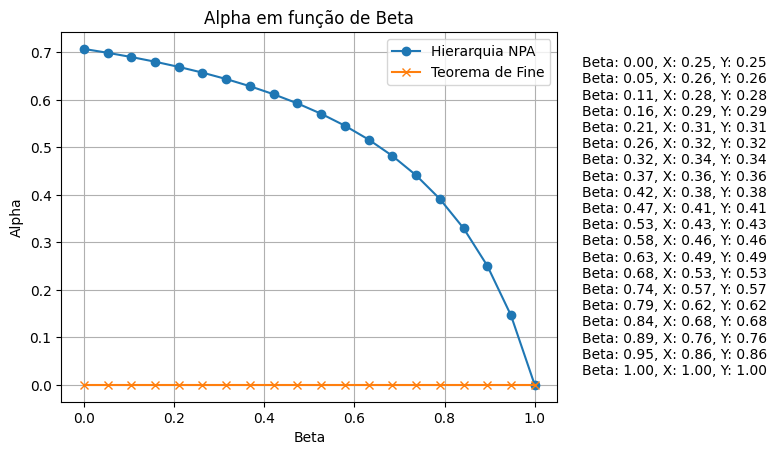

In [415]:
import matplotlib.pyplot as plt

# Listas para armazenar os valores de alpha e beta
alpha_values = []
beta_values = []
x_values = []
y_values = []
alpha_values2 = []

for beta in np.linspace(0, 1, 20):
    alpha_opt, x_opt, y_opt = func_opt(beta)
    alpha_values.append(alpha_opt)
    beta_values.append(beta)
    x_values.append(x_opt)
    y_values.append(y_opt)
    alpha_opt2 = func_opt2(beta)
    alpha_values2.append(alpha_opt2)
    


plt.plot(beta_values, alpha_values, marker='o', linestyle='-', label="Hierarquia NPA")
plt.plot(beta_values, alpha_values2, marker='x', linestyle='-', label="Teorema de Fine")
plt.xlabel('Beta')
plt.ylabel('Alpha')
plt.title('Alpha em função de Beta')

# Adicionando uma legenda lateral
legend_text = '\n'.join([f'Beta: {beta:.2f}, X: {x:.2f}, Y: {y:.2f}' for beta, x, y in zip(beta_values, x_values, y_values)])
plt.text(1.05, 0.5, legend_text, transform=plt.gca().transAxes, fontsize=10, verticalalignment='center')




plt.grid(True)
plt.legend()
plt.savefig('grafico.png')
plt.show()

